In [1]:
install.packages("ergm")
library(ergm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘DEoptimR’, ‘network’, ‘robustbase’, ‘coda’, ‘trust’, ‘lpSolve’, ‘statnet.common’


Loading required package: network

network: Classes for Relational Data
Version 1.16.0 created on 2019-11-30.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



ergm: version 3.10.4, created on 2019-06-10
Copyright (c) 2019, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
   

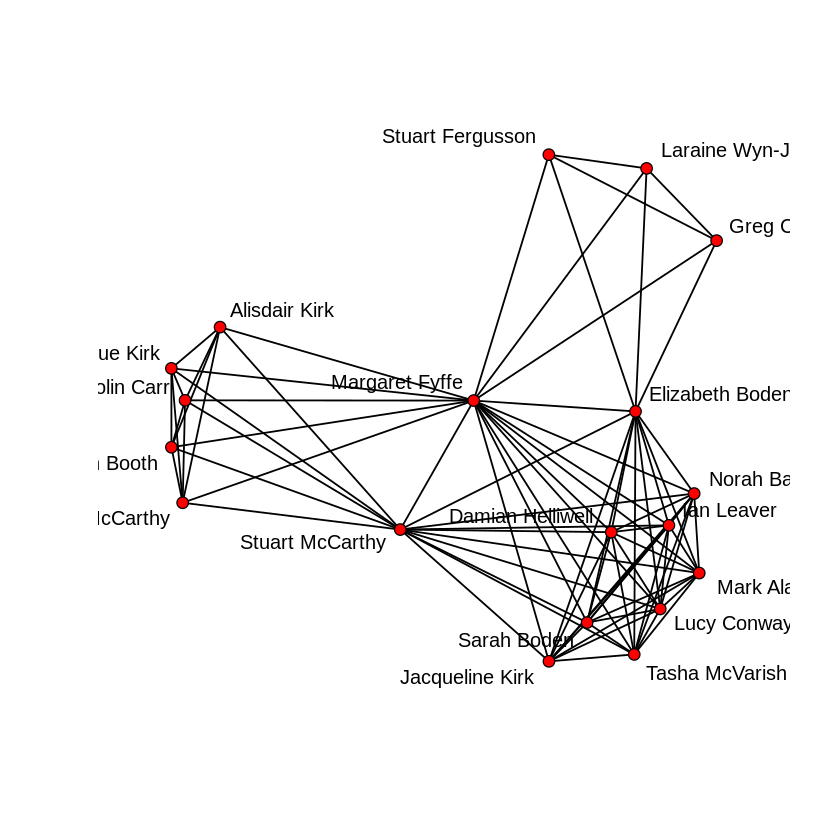

In [2]:
members <- read.table("/employees.txt",header=FALSE,sep=" ")
L <- readLines("/exportLabels.txt")
DF <- read.table(text = L, sep = "0",header=FALSE, stringsAsFactors=F, strip.white=T, as.is=T)
politicalNet <- network(members,vertex.attr=DF,vertex.attrnames = c("label"),directed=F, hyper=F, loops=F, multiple=F, bipartite=F)
plot(politicalNet,label=get.vertex.attribute(politicalNet, "label"))

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Warning message in ergm.mple(nw, fd, m, MPLEtype = MPLEtype, init = init, control = control, :
“glm.fit: algorithm did not convergeglm.fit: fitted probabilities numerically 0 or 1 occurred”
Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by < 0.0001.

Step length converged once. Increasing MCMC sample size.

Iteration 2 of at most 20:

Optimizing with step length 1.

Warning message in ergm.MCMCse.lognormal(theta = theta, init = init, statsmatrix = statsmatrix0, :
“Approximate Hessian matrix is singular. Standard errors due to MCMC approximation of the likelihood cannot be evaluated. This is likely due to insufficient MCMC sample size or highly correlated model terms.”
The log-likelihood improved by < 0.0001.

Step length converged twice.

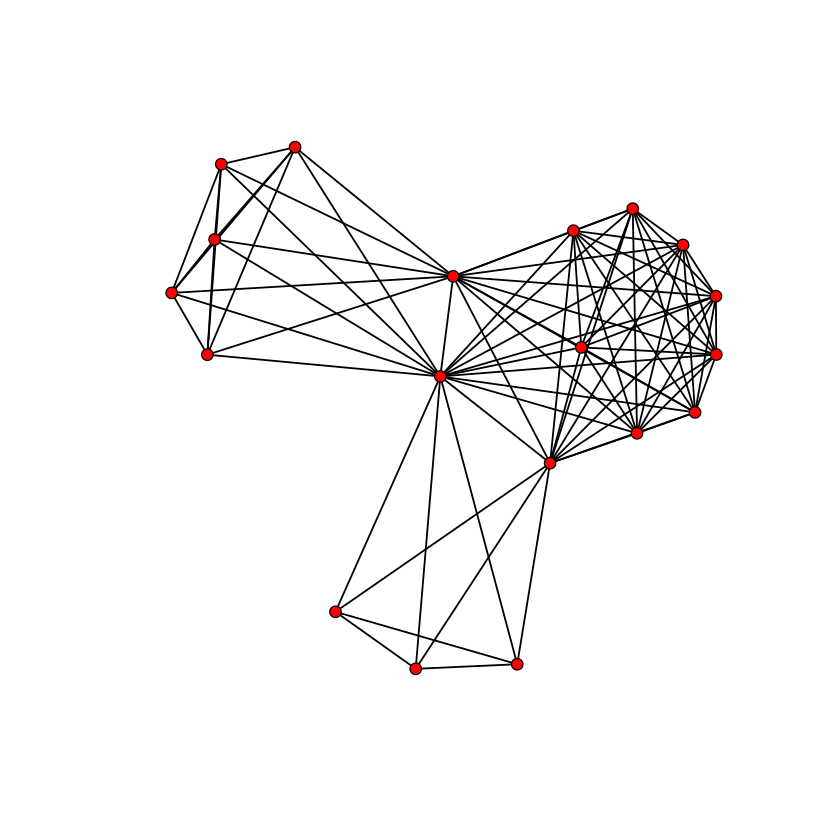

In [22]:
baseErgm <- ergm(politicalNet~edges+triangles) #Estimate the model
plot(simulate(baseErgm)) #Summarize the model

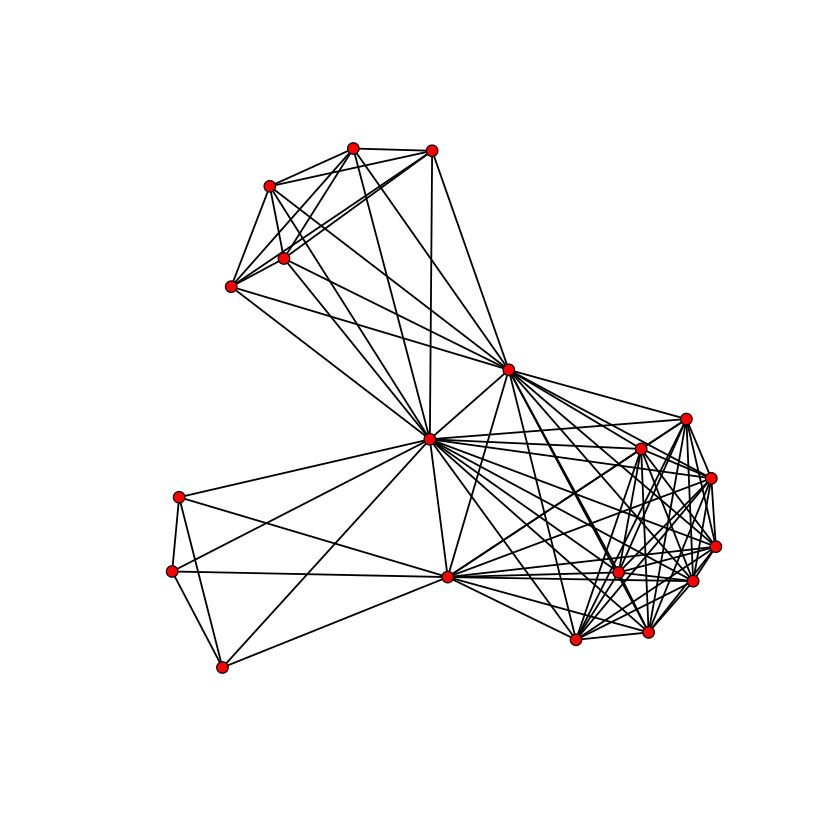

In [18]:
plot(simulate(baseErgm))